<center><span style="font-size: 30pt">Homework 4</span></center>
<center><span style="font-size: 18pt">Capucine Hustin</span></center>

In [161]:

import torch
from torch import nn

import math
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import numpy as np


In [162]:
#initialize random 
torch.manual_seed(111)

<center><span style="font-size: 25pt">Generate Synthetic Data</span></center>

Training Data for $x_2 = sinx_1$

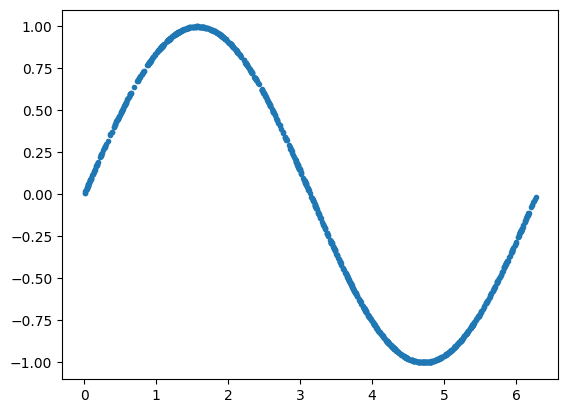

In [163]:
#prepare the training data
train_data_length = 1024
train_data_sin = torch.zeros((train_data_length, 2))
train_data_sin[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data_sin[:, 1] = torch.sin(train_data_sin[:, 0])
train_labels_sin = torch.zeros(train_data_length)
train_set_sin = [
    (train_data_sin[i], train_labels_sin[i]) for i in range(train_data_length)
]
plt.plot(train_data_sin[:, 0], train_data_sin[:, 1], ".")

Training Data for $x_1^2 + x_2^2 =1$

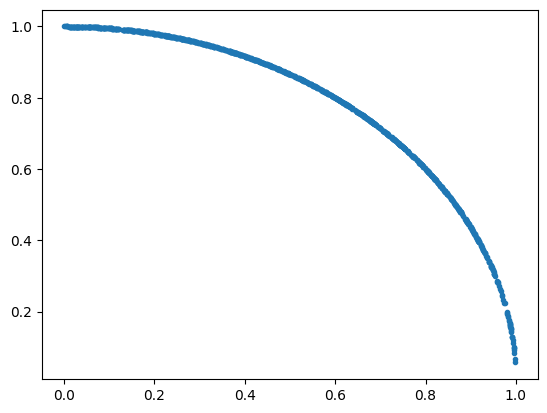

In [164]:
train_data_circle = torch.zeros((train_data_length, 2))
train_data_circle[:, 0] = torch.rand(train_data_length)  
train_data_circle[:, 1] = torch.sqrt(1 - train_data_circle[:, 0]**2)  
train_labels_circle = torch.zeros(train_data_length)
train_set_circle = [
    (train_data_circle[i], train_labels_circle[i]) for i in range(train_data_length)
]

plt.plot(train_data_circle[:, 0], train_data_circle[:, 1], ".")

Training Data for (θ, cos 2θ)

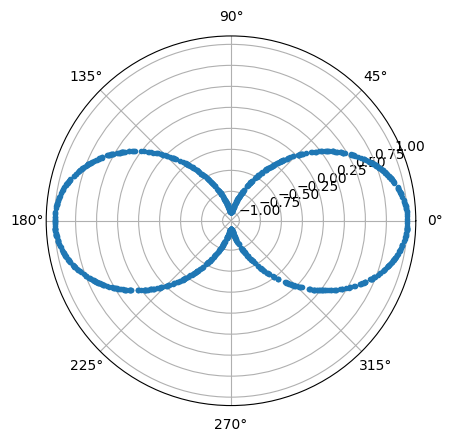

In [165]:
train_data_cos = torch.zeros((train_data_length, 2))
train_data_cos[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data_cos[:, 1] = torch.cos(2*train_data_cos[:, 0])
train_labels_cos = torch.zeros(train_data_length)
train_set_cos = [
    (train_data_cos[i], train_labels_cos[i]) for i in range(train_data_length)
]
plt.polar(train_data_cos[:, 0], train_data_cos[:, 1], ".")

<center><span style="font-size: 30pt">Generative Adversarial Network Code</span></center>

In [166]:
#load data into the pytorch data loader
batch_size = 32
train_loader_sin = torch.utils.data.DataLoader(
    train_set_sin, batch_size=batch_size, shuffle=True
)

train_loader_circle = torch.utils.data.DataLoader(
    train_set_circle, batch_size=batch_size, shuffle=True
)

train_loader_cos = torch.utils.data.DataLoader(
    train_set_cos, batch_size=batch_size, shuffle=True
)

In [167]:
#implement the discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256), #the input is two-dimensional
            nn.ReLU(),
            nn.Dropout(0.3), #droput layers reduce overfitting
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),#sigmoid activation to represent probability
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [168]:
#implement the discriminator
class Discriminator1(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256), #the input is two-dimensional
            nn.ReLU(),
            nn.Dropout(0.3), #droput layers reduce overfitting
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),#sigmoid activation to represent probability
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [169]:
#implement the discriminator
class Discriminator2(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256), #the input is two-dimensional
            nn.ReLU(),
            nn.Dropout(0.3), #droput layers reduce overfitting
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 1),
            nn.Sigmoid(),#sigmoid activation to represent probability
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [176]:
#implement the generator
class Generator(nn.Module):
     def __init__(self):
         super().__init__()
         self.model = nn.Sequential(
             nn.Linear(1, 16),
             nn.ReLU(),
             nn.Linear(16, 32),
             nn.ReLU(),
             nn.Linear(32, 2),
         )

     def forward(self, x):
         output = self.model(x)
         return output

In [171]:
#implement the generator
class Generator1(nn.Module):
     def __init__(self):
         super().__init__()
         self.model = nn.Sequential(
             nn.Linear(2, 16),
             nn.ReLU(),
             nn.Linear(16, 32),
             nn.ReLU(),
             nn.Linear(32, 64),
             nn.ReLU(),
             nn.Linear(64, 32),
             nn.ReLU(),
             nn.Linear(32, 2),
         )

     def forward(self, x):
         output = self.model(x)
         return output

In [172]:
#implement the generator
class Generator2(nn.Module):
     def __init__(self):
         super().__init__()
         self.model = nn.Sequential(
             nn.Linear(1, 16),
             nn.Softplus(),
             nn.Linear(16, 2),
         )

     def forward(self, x):
         output = self.model(x)
         return output

In [173]:
loss_function = nn.BCELoss() #binary cross entropy loss
#Cross entropy loss measures the difference between the discovered probability distribution
#of a machine learning classification model and the predicted distribution.
#measures how well a classification model performs

Epoch: 0 Loss D.: 0.23639683425426483
Epoch: 0 Loss G.: 3.055978536605835


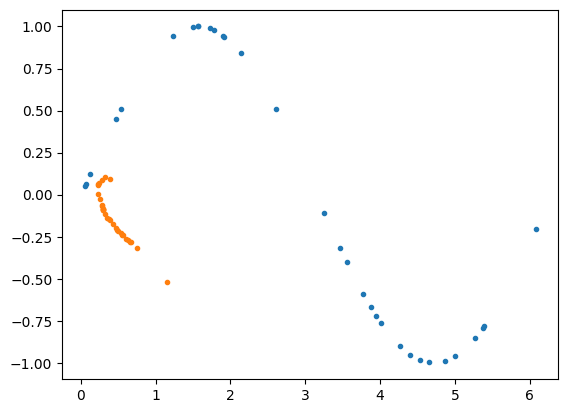

Epoch: 100 Loss D.: 0.685981273651123
Epoch: 100 Loss G.: 0.6721134185791016


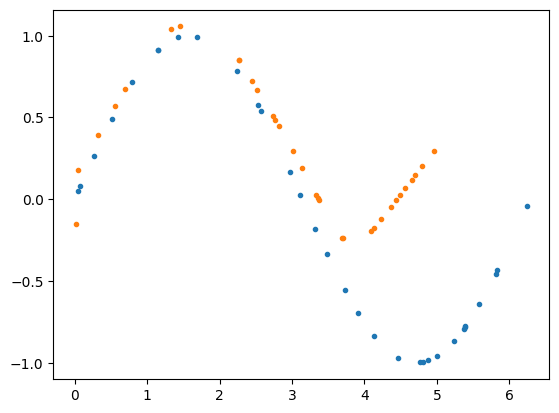

Epoch: 200 Loss D.: 0.6876941919326782
Epoch: 200 Loss G.: 0.7047455906867981


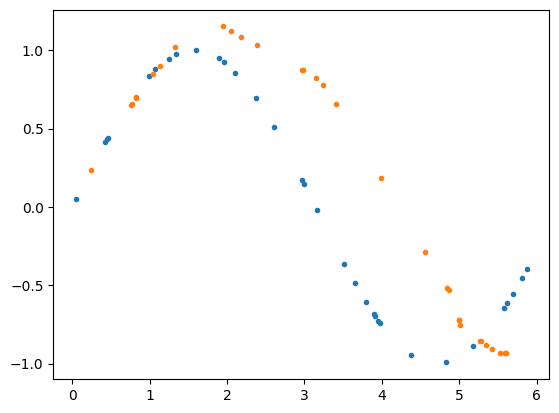

Epoch: 300 Loss D.: 0.6937112212181091
Epoch: 300 Loss G.: 0.6882798671722412


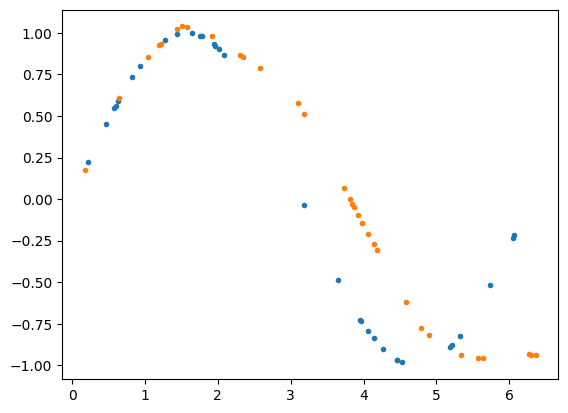

Epoch: 400 Loss D.: 0.6932647824287415
Epoch: 400 Loss G.: 0.6938822269439697


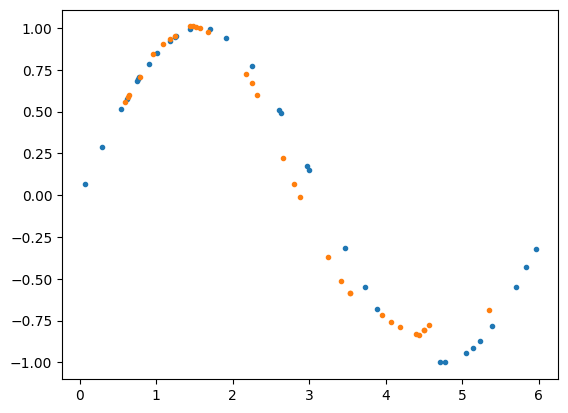

In [177]:
#training loop for the GAN
num_epochs = 400
lr_g=0.001
lr_d=0.0015
discriminator = Discriminator()
generator = Generator()
gen_loss_vector = []
discr_loss_vector= []
num_epoch_vector = []
#use Adam algorithm to update weights of numerator and discriminator
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr_d)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr_g)

for epoch in range(num_epochs+1):
    for n, (real_samples, _) in enumerate(train_loader_sin):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 1))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))      
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )
        #differentiate between real and generated samples

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 1))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        
        output_discriminator_generated = discriminator(generated_samples)
        #want to minimized generator loss
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        #discriminateor weights frozen since optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            gen_loss_vector.append(float(loss_generator))
            discr_loss_vector.append(float(loss_discriminator))
            num_epoch_vector.append(epoch)
        if epoch % 100 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")
            
            generated_samples_for_plotting = generated_samples.detach()
            plt.figure()
            plt.plot(real_samples[:, 0], real_samples[:, 1], ".")
            plt.plot(generated_samples_for_plotting[:, 0], generated_samples_for_plotting[:, 1], ".")
            plt.show()
            

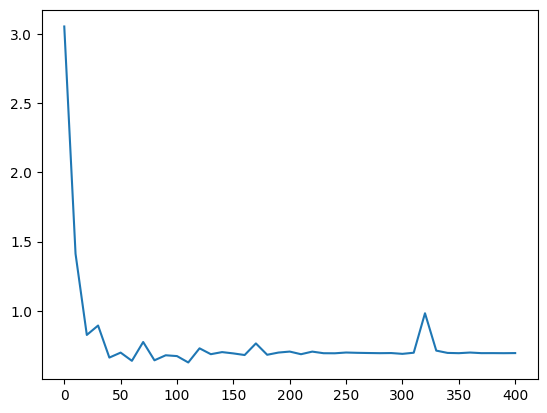

In [178]:
#generator loss
plt.plot(num_epoch_vector, gen_loss_vector) 
plt.show()

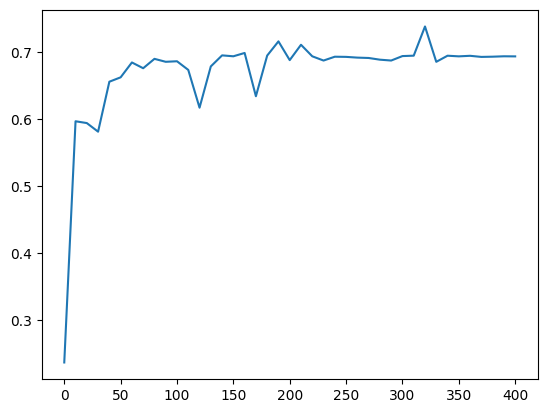

In [179]:
#discriminator loss
plt.plot(num_epoch_vector, discr_loss_vector) 
plt.show()

Epoch: 0 Loss D.: 0.34385818243026733
Epoch: 0 Loss G.: 3.9340858459472656


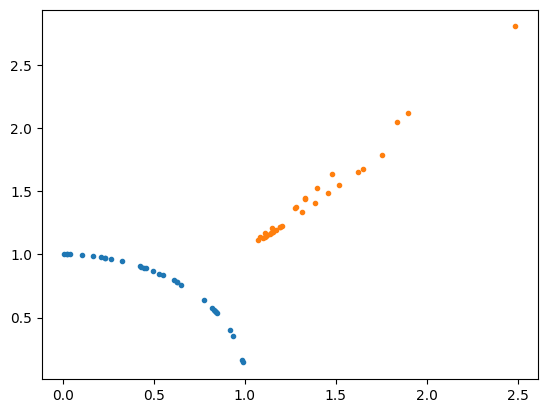

Epoch: 100 Loss D.: 0.6009649634361267
Epoch: 100 Loss G.: 0.7242631316184998


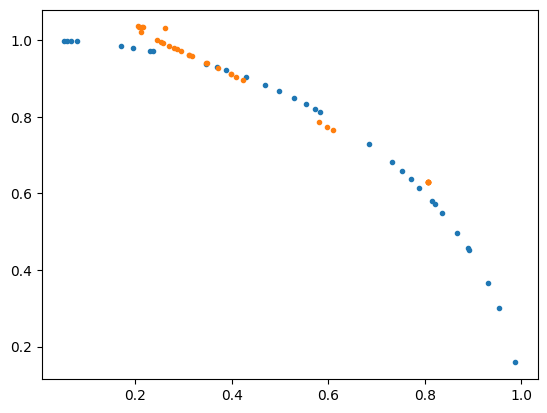

Epoch: 200 Loss D.: 0.6936873197555542
Epoch: 200 Loss G.: 0.7075958251953125


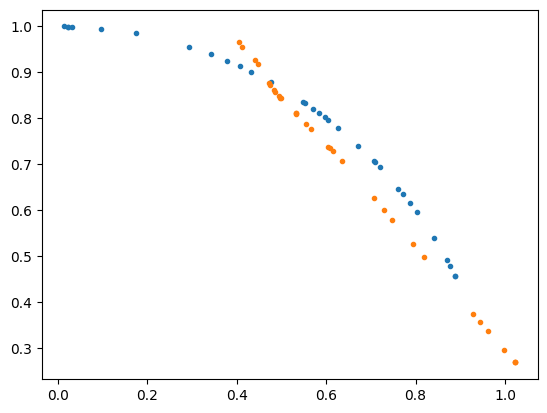

Epoch: 300 Loss D.: 0.7016944289207458
Epoch: 300 Loss G.: 0.6680288910865784


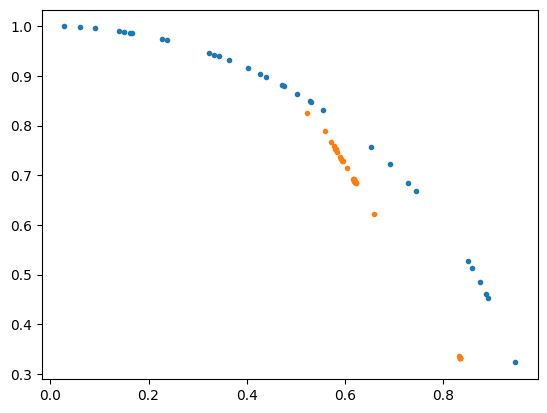

Epoch: 400 Loss D.: 0.6931471824645996
Epoch: 400 Loss G.: 0.6931471824645996


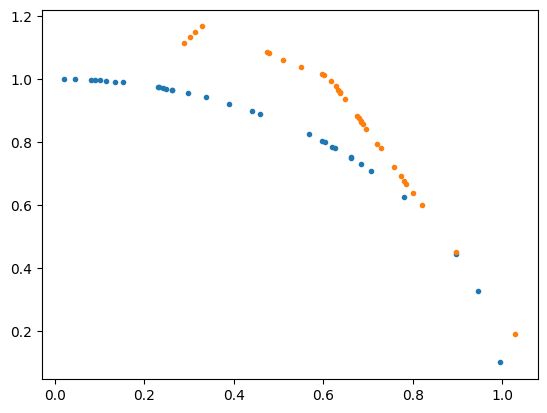

In [181]:
num_epochs = 400
lr_g=0.006
lr_d=0.008
#training loop for the GAN
discriminator = Discriminator()
generator = Generator()
gen_loss_vector = []
discr_loss_vector = []
num_epoch_vector = []
#use Adam algorithm to update weights of numerator and discriminator
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr_d)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr_g)

for epoch in range(num_epochs+1):
    for n, (real_samples, _) in enumerate(train_loader_circle):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 1))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))      
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )
        #differentiate between real and generated samples

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 1))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        
        output_discriminator_generated = discriminator(generated_samples)
        #want to minimized generator loss
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        #discriminateor weights frozen since optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            gen_loss_vector.append(float(loss_generator))
            discr_loss_vector.append(float(loss_discriminator))
            num_epoch_vector.append(epoch)
        if epoch % 100 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")
            
            generated_samples_for_plotting = generated_samples.detach()
            plt.figure()
            plt.plot(real_samples[:, 0], real_samples[:, 1], ".")
            plt.plot(generated_samples_for_plotting[:, 0], generated_samples_for_plotting[:, 1], ".")
            plt.show()
            

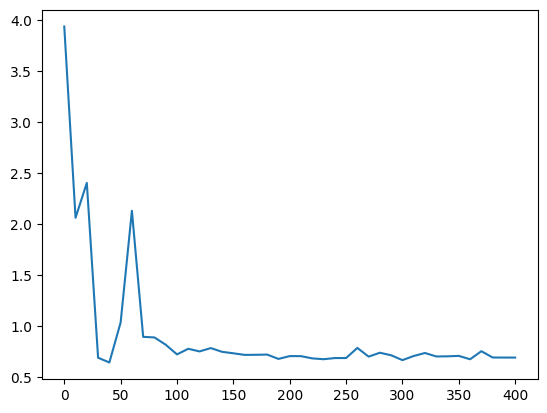

In [182]:
#generator loss
plt.plot(num_epoch_vector, gen_loss_vector) 
plt.show()

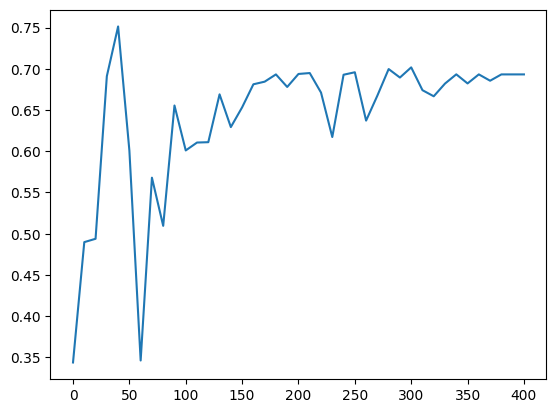

In [183]:
#discriminator loss
plt.plot(num_epoch_vector, discr_loss_vector) 
plt.show()

Epoch: 0 Loss D.: 0.20233730971813202
Epoch: 0 Loss G.: 1.8358875513076782


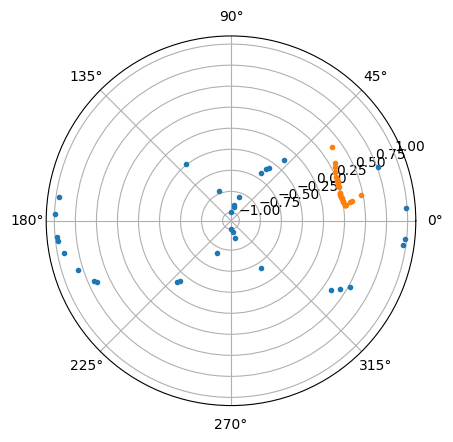

Epoch: 100 Loss D.: 0.6673917770385742
Epoch: 100 Loss G.: 0.8703264594078064


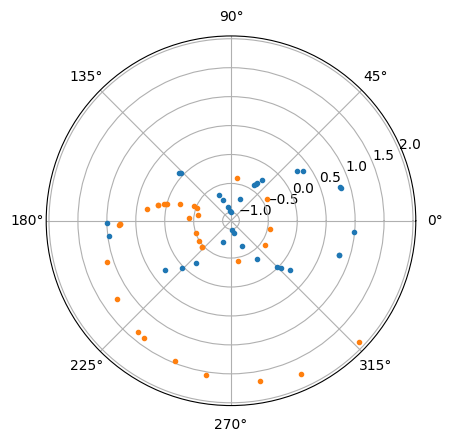

Epoch: 200 Loss D.: 0.6035698056221008
Epoch: 200 Loss G.: 0.9685917496681213


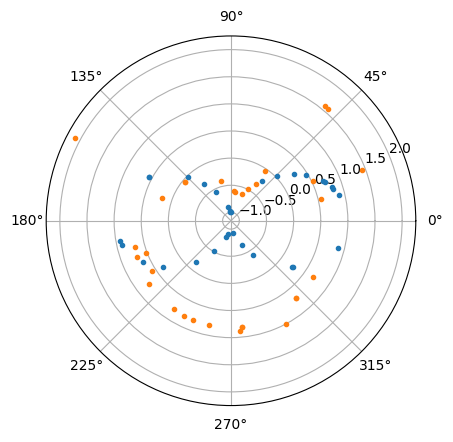

Epoch: 300 Loss D.: 0.6849766373634338
Epoch: 300 Loss G.: 0.6924494504928589


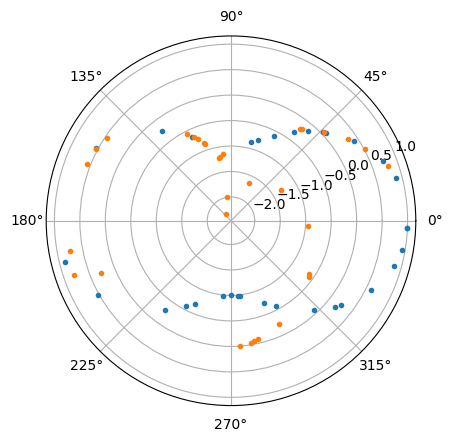

Epoch: 400 Loss D.: 0.6731800436973572
Epoch: 400 Loss G.: 0.7307069897651672


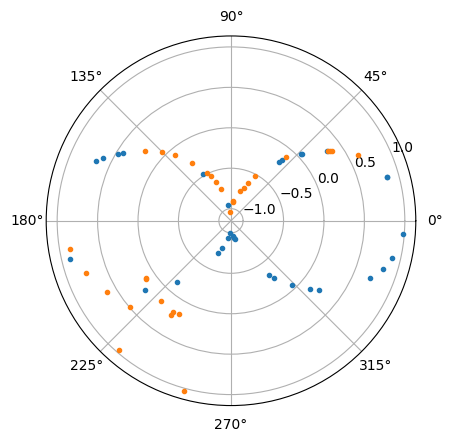

In [187]:
#training loop for the GAN
num_epochs = 400
lr_d=0.001
lr_g=0.001
discriminator = Discriminator1()
generator = Generator()
gen_loss_vector = []
discr_loss_vector = []
num_epoch_vector = []
#use Adam algorithm to update weights of numerator and discriminator
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr_d)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr_g)

for epoch in range(num_epochs+1):
    for n, (real_samples, _) in enumerate(train_loader_cos):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 1))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))      
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )
        #differentiate between real and generated samples

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 1))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        
        output_discriminator_generated = discriminator(generated_samples)
        #want to minimized generator loss
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        #discriminateor weights frozen since optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            gen_loss_vector.append(float(loss_generator))
            discr_loss_vector.append(float(loss_discriminator))
            num_epoch_vector.append(epoch)
        if epoch % 100 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")
            
            generated_samples_for_plotting = generated_samples.detach()
            plt.figure()
            plt.polar(real_samples[:, 0], real_samples[:, 1], ".")
            plt.polar(generated_samples_for_plotting[:, 0], generated_samples_for_plotting[:, 1], ".")
            plt.show()
            

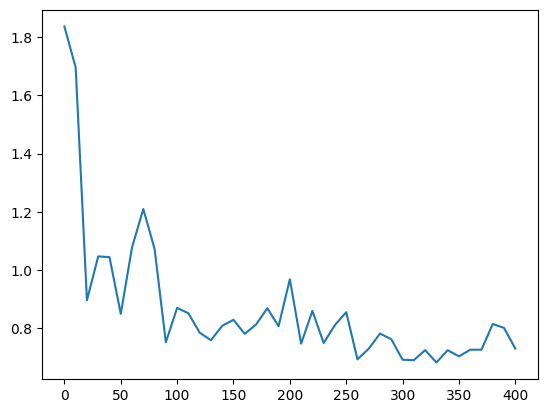

In [188]:
#generator loss
plt.plot(num_epoch_vector, gen_loss_vector) 
plt.show()

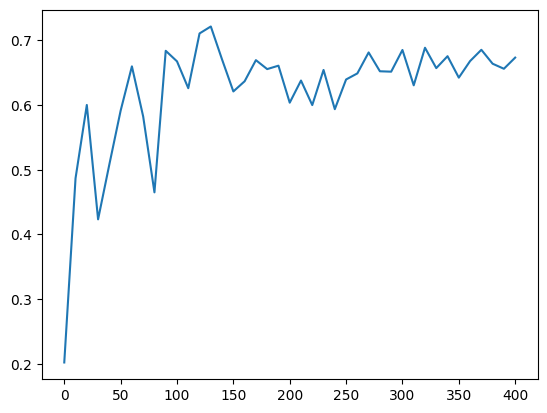

In [189]:
#discriminator loss
plt.plot(num_epoch_vector, discr_loss_vector) 
plt.show()

<center><span style="font-size: 25pt">Neural Network Architecture</span></center>

<u><span style="font-size: 16pt">For the Data:</span></u>

I used 1024 points of training data because it a power of 2 and is easier to choose a batch with that, and the number was enough to modelize well the real function (no large space between the points when plotted)
I chose the batch size equal to 32 because it has a good proportion compared to the 1024 number of points chosen for the training data set. 
However the running of the algorithm was quite slow and 64 would have make it faster. 

I chose 500 epochs because it seems to be reasonably good synthetic data around 100 epochs for all the examples and having 500 epochs gives a good perspective of the decreasing loss (or increasing loss for the Discriminator).

<u><span style="font-size: 16pt">For the Discriminator:</span></u>

I tried 3 different Discriminator Architectures:
   - Discriminator: 4 hidden layers of size (2,256), (256, 128), (128,64), (64,1)
   - Discriminator1: 5 hidden layers of size (2,256), (256, 128), (128,64), (64,32), (32,1)
   - Discriminator2: 3 hidden layers of size (2,256), (256, 64), (64,1) 

We add some dropout to reduce oversitting between the hidden layers. 
The losses function were only ReLU excepted the last layer was sigmoïd because the output has to be a probability. 

The most effective one seemed to be the Discriminator (first one). I compared them with the first generator (to have similar base). The loss functions were converging quicker.

I didn't used too many hidden layers because it is might overfit.

I used the Adam for the optimization because it is the most used and converges quite quickly.

For the loss function I chose the binary cross entropy loss, to measure how well the classification model perform.

<u><span style="font-size: 16pt">For the Generator:</span></u>


I tried 3 different Generator Architectures:
   - Generator: 3 hidden layers of size (2,16), (16,32), (32,2) and only ReLU as activation functions
   - Generator1: 5 hidden layers of size (2,16), (16,32) (32,64), (64,32), (32,2) and only ReLU as activation functions
   - Generator2: 2 hidden layers of size (2,16) and (16,2) and Softplus as activation function

The most effective one was the Generator (they were compared with the first Discriminator).

I didn't used too many hidden layers because it is harder to train (doesn't necessarly converge) and make it more unstable. We could see that for the Generator1 the loss was less stable. Also it might lead to the mode collapse if we have too many layers. 

I primarly used ReLU as activation function because it is faster and easier for the gradient descent and it prevent the disparition of the gradient.

I used the Adam for the optimization because it is the most used and converges quite quickly.

I chose 0,005 for the learning rate after few trials. I initially tried 0,01 but the loss stagnated quite quickly. 0,005 worked quite well and bellow it didn't make a real difference in term of loss, but the time was longer.

For the loss function I chose the binary cross entropy loss, to measure how well the classification model perform.

<u><span style="font-size: 16pt">For the learning rates:</span></u>

For all examples I initially tried (lr discriminator, lr generator)=(0.005, 0.005) and (0.001,0.001) and then tried to adjust.

<u>For $x_2=sin(x_1)$</u>:

I chose (lr discriminator, lr generator)=(0.001, 0.001) because the fisrt trial with (0.001,0.001) worked well. I tried (0.005, 0.005) and other learning rates and the losses had difficulties converging.

<u>For $x_1^2+x_2^2$</u>:

Trying with (0.001,0.001) and (0.005, 0.005) the two losses weren't converging at all in the 500 first epochs so I increased the rates until (0.008, 0.006) and the GAN worked pretty well with those. 

<u>For (θ, cos 2θ)</u>:

(0.001,0.001) and (0.005, 0.005) was ok but the convergence of the loss weren't really good so I chose in between rate (0.003, 0.002)



<u><span style="font-size: 16pt">How many epochs did it take you to train the GAN to generate ”reasonably” good synthetic data?</span></u>

It took about 100 epochs to generate "reasonnably" good synthetic data according to the graph of the generator and dicriminator losses. (the losses converge towards 0.6) for all of the examples 

<center><span style="font-size: 25pt">Bonus</span></center>

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

NCLH= yf.Ticker("NCLH")

#completing missing data with the 3 first days of 2020 (because otherwise the last vector is of size 57 and not 60) for later

NCLH_historical = NCLH.history(start="2015-01-01", end="2020-01-04", interval="1d")

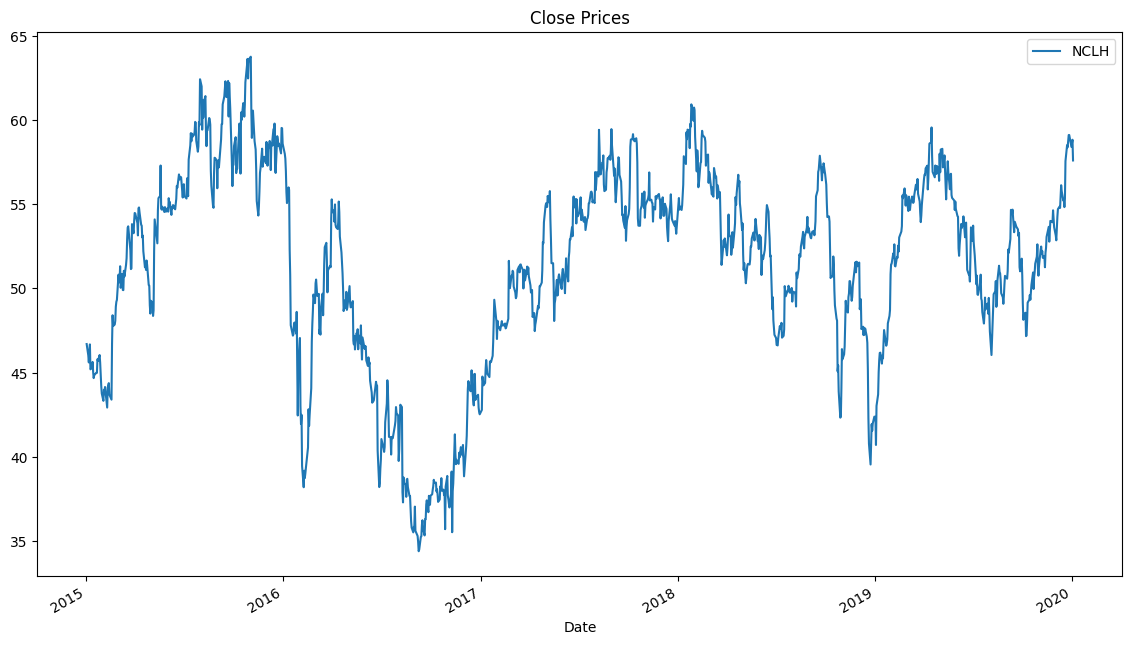

In [ ]:
plt.figure(figsize=(14, 8))
NCLH_historical.Close.plot(label='NCLH')
plt.title('Close Prices')
plt.legend()
plt.show()

#It seems quite stable

In [ ]:
N=len(NCLH_historical)//60

data_numpy=NCLH_historical['Close'].to_numpy()

# Convertissez le tableau NumPy en un tensor PyTorch
torch_NCLH = torch.tensor(data_numpy, dtype=torch.float32)

point_number=[i for i in range(N*60)]
train_set_NCLH1=[(torch.tensor(point_number[i], dtype=torch.float32), torch_NCLH[i]) for i in range(N*60)]
train_set_NCLH = [
    (torch.tensor(point_number[60*i:60*(i+1)], dtype=torch.int32), torch_NCLH[60*i:60*(i+1)]) for i in range(N)
]

train_set_NCLH1

[(tensor(0.), tensor(46.7000)),
 (tensor(1.), tensor(46.0300)),
 (tensor(2.), tensor(45.6100)),
 (tensor(3.), tensor(46.2100)),
 (tensor(4.), tensor(46.6800)),
 (tensor(5.), tensor(45.2000)),
 (tensor(6.), tensor(45.3200)),
 (tensor(7.), tensor(45.6400)),
 (tensor(8.), tensor(45.0400)),
 (tensor(9.), tensor(44.6800)),
 (tensor(10.), tensor(44.8500)),
 (tensor(11.), tensor(45.)),
 (tensor(12.), tensor(44.9900)),
 (tensor(13.), tensor(45.8000)),
 (tensor(14.), tensor(45.7000)),
 (tensor(15.), tensor(46.0500)),
 (tensor(16.), tensor(45.6000)),
 (tensor(17.), tensor(44.9100)),
 (tensor(18.), tensor(44.2100)),
 (tensor(19.), tensor(43.7600)),
 (tensor(20.), tensor(43.3300)),
 (tensor(21.), tensor(43.9900)),
 (tensor(22.), tensor(43.7300)),
 (tensor(23.), tensor(44.1500)),
 (tensor(24.), tensor(43.8500)),
 (tensor(25.), tensor(42.9300)),
 (tensor(26.), tensor(44.1200)),
 (tensor(27.), tensor(44.2500)),
 (tensor(28.), tensor(44.3800)),
 (tensor(29.), tensor(43.7100)),
 (tensor(30.), tensor(43

In [ ]:
batch_size = 1
train_loader_yfinance = torch.utils.data.DataLoader(
    train_set_NCLH, batch_size=batch_size, shuffle=True
)

In [ ]:
#implement the discriminator
class Discriminator_NCLH(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(60, 256), 
            nn.ReLU(),
            nn.Dropout(0.3), #droput layers reduce overfitting
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),#sigmoid activation to represent probability
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [ ]:
#implement the generator
class Generator_NCLH(nn.Module):
     def __init__(self):
         super().__init__()
         self.model = nn.Sequential(
             nn.Linear(60, 120),
             nn.ReLU(),
             nn.Linear(120, 80),
             nn.ReLU(),
             nn.Linear(80, 60),
         )

     def forward(self, x):
         output = self.model(x)
         return output

Epoch: 0 Loss D.: 0.3336852788925171
Epoch: 0 Loss G.: 0.7077600955963135


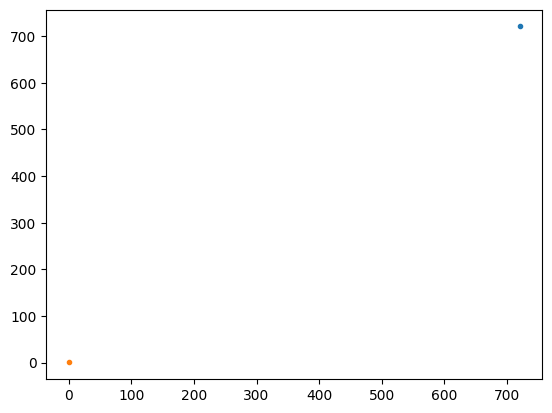

Epoch: 50 Loss D.: 50.0
Epoch: 50 Loss G.: 16.140846252441406


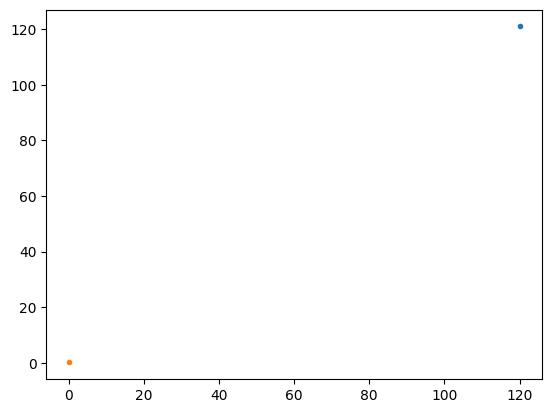

KeyboardInterrupt: 

In [ ]:
num_epochs = 400
lr=0.005
#training loop for the GAN
discriminator = Discriminator_NCLH()
generator = Generator_NCLH()
gen_loss_vector = []
discr_loss_vector = []
num_epoch_vector = []
#use Adam algorithm to update weights of numerator and discriminator
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader_yfinance):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 60))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))      
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )
        #differentiate between real and generated samples

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 60))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        
        output_discriminator_generated = discriminator(generated_samples)
        #want to minimized generator loss
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        #discriminateor weights frozen since optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)
        optimizer_generator.step()

        # Show loss
        if epoch % 50 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")
            
            gen_loss_vector.append(float(loss_generator))
            discr_loss_vector.append(float(loss_discriminator))
            num_epoch_vector.append(epoch)
            
            generated_samples_for_plotting = generated_samples.detach()
            plt.figure()
            plt.plot(real_samples[:, 0], real_samples[:, 1], ".")
            plt.plot(generated_samples_for_plotting[:, 0], generated_samples_for_plotting[:, 1], ".")
            plt.show()
            

In [ ]:
batch_size=60

train_loader_NCLH = torch.utils.data.DataLoader(
    train_set_NCLH1, batch_size=batch_size, shuffle=True
)

num_epochs = 400
lr=0.005
#training loop for the GAN
discriminator = Discriminator()
generator = Generator()
gen_loss_vector = []
discr_loss_vector = []
num_epoch_vector = []
#use Adam algorithm to update weights of numerator and discriminator
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader_NCLH):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))      
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )
        #differentiate between real and generated samples

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        
        output_discriminator_generated = discriminator(generated_samples)
        #want to minimized generator loss
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        #discriminateor weights frozen since optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)
        optimizer_generator.step()

        # Show loss
        if epoch % 50 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")
            
            gen_loss_vector.append(float(loss_generator))
            discr_loss_vector.append(float(loss_discriminator))
            num_epoch_vector.append(epoch)
            
            generated_samples_for_plotting = generated_samples.detach()
            plt.figure()
            plt.plot(real_samples[:, 0], real_samples[:, 1], ".")
            plt.plot(generated_samples_for_plotting[:, 0], generated_samples_for_plotting[:, 1], ".")
            plt.show()
            

RuntimeError: Tensors must have same number of dimensions: got 1 and 2